# The Kullback-Leibler divergence

We will just spend a few words on a well-known measure of how dissimilar a given distribution is from another reference distribution. First we will give a definition for such a measure and then we will provide some intuitive meaning together with some useful coding snippets. 

### Definition

Let’s begin with the discrete case. So let $P$ and $Q$ be two probability distributions defined on the same probability space $\mathcal{X}$ . A first attempt may be considering the average of the difference between the distributions. Quite close indeed, the following defintion is just a little bit different. The Kullback-Leibler divergence (also called relative entropy) $\mathrm{KL}(P ‖ Q)$ is defined as the average of the difference between the logarithms of probabilities $P(x)$ and $Q(x)$:

$\mathrm{KL}(P\Vert Q) \, \stackrel{\mathsf{def}}{=} \, \mathbb{E} \big[ \log P(x)  - \log Q(x) \big]\,.$

The expectation is taken using the probabilities $P$ (often written as $x \sim P$). The definition of expectation leads to the expression

$\displaystyle \mathrm{KL}(P\Vert Q) = \sum_{x \in \mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right).$

In the case of continuous distributions we write

$\displaystyle \mathrm{KL}(P\Vert Q) = \int_{-\infty}^\infty p(x) \log\left(\frac{p(x)}{q(x)}\right) \,\mathrm{d}x$

where $p(x)$ and $q(x)$ are $P$ and $Q$ respective densities. 

KL divergence is often called a “distance” but it is not a distance in mathematical sense (a metric): KL divergence is not symmetrical. This means that $\mathrm{KL}(P ‖ Q)$ is generally different from $\mathrm{KL}(Q ‖ P)$.

If $Q(x)$ is 0 for some $x$, the KL divergence is not defined unless it is $P(x) = 0$. What if $P$ is 0 somewhere? In this case, we interpret that the KL divergence must be zero since when $a$ approaches 0, the expression $a\log(a)$ tends to 0 .

### Motivations behind the definition

A first intuition comes form the fact that if $\{p_i\}$ and $\{q_i\}$ are two probability mass functions, that is, two countable or finite sequences of nonnegative numbers that sum to one, then 

$\displaystyle  \sum_{i} p_i \log \left(\frac{p_i}{q_i}\right) \geq 0$

with equality if and only if $p_i = q_i$ for all $i$. The fact that the divergence of one probability distribution with respect to another is nonnegative and zero only when the two distributions are the same suggests the interpretation of KL divergence as a “distance” between two distributions, that is, a measure of how different the two distributions are.

A second intuition about the fact that KL divergence actually expresses some kind of distance between two distributions comes from the expression 

$\begin{aligned} \displaystyle \mathrm{KL}(P\Vert Q) &= \int_{-\infty}^\infty p(x) \left( \log p(x) - \log q(x) \right) \, \mathrm{d}x \\& = \int_{-\infty}^\infty p(x) D(x)\, \mathrm{d}x \end{aligned}$

where it is immediate to recognize that the difference between logarithms $D(x)$ is a term expressing the gap between the two distributions. If the average gap is small, then the two distributions are “similar” or “close”. 

![kl1](kldivergence1.png)

### Connection with cross entropy

KL divergence $\mathrm{KL}(P ‖ Q)$ is equal to 

$\begin{aligned} \displaystyle \mathrm{KL}(P\Vert Q) &= - \sum_x P(x)  \log Q(x) + \sum_x P(x) \log P(x) \\& = H(P,Q) + H(P) \end{aligned}$

where $H(P , Q)$ is the cross entropy of $P$ and $Q$ and $H(P)$ is the entropy of $P$. As we said, $\mathrm{KL}(P ‖ Q)$ can be thought of as something like a measurement of how far the distribution $Q$ is from the distribution $P$. But cross entropy is itself such a measurement… the difference is that cross entropy has a — generally nonzero — minimum when $P = Q$, that is $H(P , P) = H(P)$; so in KL divergence we subtract the entropy term $H(P)$ to attain minimum value $0$. This is coherent with the property that the distance of an object from itself should be zero. 

### Quick example

Let $P$ and $Q$ be the following distributions (each possible outcome $x$ is in $\mathcal{X} = \{0, 1, 2\}$):

![table](table.png)

![kl2](kldivergence2.png)

The following picture shows both $P$ (amber) and $Q$ (gray) overlapping.

![kl3.1](kldivergence3-1.png)

Next picture shows the logarithm of distributions with the difference $D$ at $x = 2$.

![kl4](kldivergence4.png)

Let’s calculate $\mathrm{KL}(P ‖ Q)$.

$\begin{aligned} \displaystyle \mathrm{KL}(P\Vert Q) &= \sum_x P(x)  \log \left( \frac{P(x)}{Q(x)} \right) \\&= 9/25 \log\left(\frac{9/25}{1/3}\right) + 12/25 \log\left(\frac{12/25}{1/3} \right) + 4/25 \log\left(\frac{4/25}{1/3} \right) \\& \approx 0.0853\,. \end{aligned}$

Interchanging the arguments, we find that $\mathrm{KL}(Q ‖ P)$ is approximately 0.0974 and this value is different from the previous.

### Evaluate KL divergence with Python

Import the [entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function

In [2]:
!pip install scipy
from scipy.stats import entropy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 55.0 MB/s eta 0:00:0000:0100:01


and then compute $\mathrm{KL}(Q ‖ P)$ from the example above in just one line. 

In [3]:
entropy([9/25, 12/25, 4/25], qk=[1/3, 1/3, 1/3])

0.0852996013183706

Below, a simple Python coding example for figures 1~4 above. Note that the two continuous density curves have a magnifying coefficient for scaling purposes. 

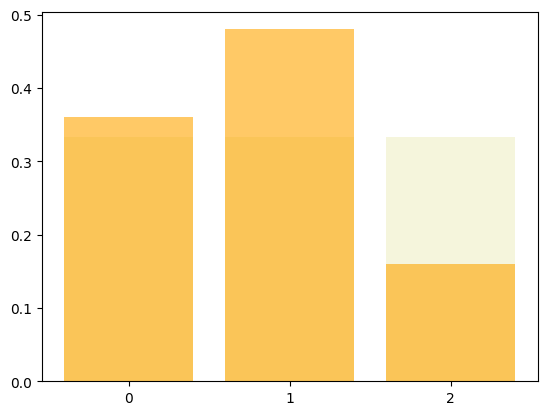

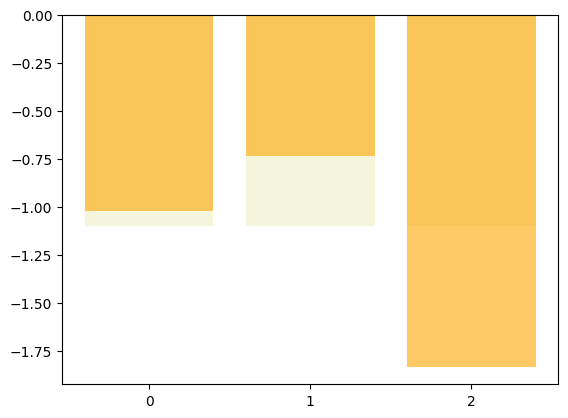

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 

p = [9/25, 12/25, 4/25]
q = [1./3,1./3,1./3]
xx = ['0','1','2']

logq = np.log(q)
logp = np.log(p)

plt.bar(xx, q, color='beige')
plt.bar(xx, p, alpha=.6, color='orange')
plt.show()

plt.bar(xx, logq, color='beige')
plt.bar(xx, logp, alpha=.6, color='orange')
plt.show()

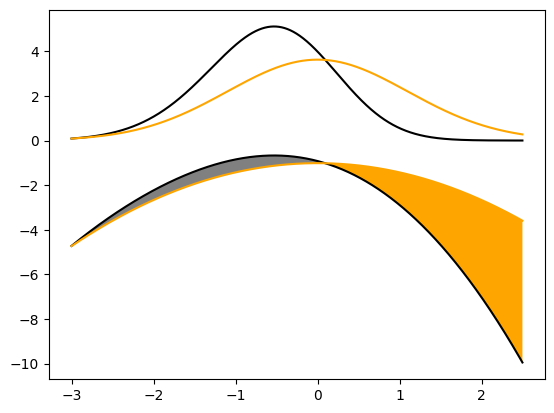

In [19]:
from scipy.stats import norm, skewnorm

x = np.arange(-3,2.5,.001)
plt.plot(x, 10*skewnorm.pdf(x,-1.2), color='black')
plt.plot(x, 10*norm.pdf(x, scale=1.1), color='orange')
log1 = np.log(skewnorm.pdf(x,-1.2))
log2 = np.log(norm.pdf(x, scale=1.1))
plt.plot(x, log1, color='black')
plt.plot(x, log2, color='orange')
plt.fill_between(x, log1, log2, 
                 where=log1>=log2, facecolor='grey', 
                 interpolate=True)
plt.fill_between(x, log1, log2, 
                 where=log1<log2, facecolor='orange', 
                 interpolate=True)
plt.show()